In [172]:
#Necessary so that each cell can produce multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Case Study 6: Social Network Analysis
***
## 4.3.1: Introduction to Network Analysis
***
- Learn about the basic components of __networks__ and the __graphs__ that represent them
- Learn basic network concepts such as __neighbor, degree, path, component__, and __largest connected component__

Many systems of scientific and societal interest consist of a large # of interacting components whose structure can be represented by networks 

## 4.3.2: Basics of NetworkX
***
- Learn how to use the __NetworkX module__ to create and manipulate network graphs

NOTE: Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this unit...

- No changes to the code are necessary. However, some of the data types of the returned objects have changed.
- Previously, G.nodes() returned a list object, while now it returns a NodeView object. (See 1:46 in the video.)
- Previously, G.edges() returned a list object, while now it returns an EdgeView object. (See 3:35 in the video.)


In [173]:
import networkx as nx
G =nx.Graph()
G.add_node(1)
#takes a list as input
G.add_nodes_from([2,3])

G.add_nodes_from(['u', 'v'])
G.nodes


NodeView((1, 2, 3, 'u', 'v'))

Similar functions exist for adding edges (remember that edges are treated as pairs of nodes)

In [174]:
#adding one edge
G.add_edge(1,2)
G.add_edge('u', 'v')

#adding muultiple edges at once
# We can add an edge even if those edges don't exist as part of the graph
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

G.add_edge('u', 'w')

G.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

We can also remove nodes and edges from our graph. Let's try removing node 2:

In [175]:
G.nodes
G.remove_node(2)
G.nodes

NodeView((1, 2, 3, 'u', 'v', 4, 5, 6, 'w'))

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

We can also remove multiple nodes at the same time (using the .remove_nodes_from method)

In [176]:
G.nodes
G.remove_nodes_from([4,5])
G.nodes

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

NodeView((1, 3, 'u', 'v', 6, 'w'))

We can also remove edges from our graph

In [177]:
G.edges
G.remove_edge(1,3)
G.edges


EdgeView([(1, 3), (1, 6), ('u', 'v'), ('u', 'w')])

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

To remove multiple edges, we can use the .remove_edges_from method

In [178]:
G.remove_edges_from([(1,2), ('u', 'v')])
G.edges

EdgeView([(1, 6), ('u', 'w')])

We can also find the number of nodes and edges in our graph:

In [179]:
G.number_of_nodes()
G.number_of_edges()

6

2

In [180]:
# Basics of NetworkX: Question 1

# Consider the following code:
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))
G.number_of_nodes(), G.number_of_edges()
# What does this return?

#It returns an error. add_nodes_from and add_edges_from take only a single iterable argument each.

TypeError: add_nodes_from() takes 2 positional arguments but 5 were given

## 4.3.3: Graph Visualization
***
- Learn how to use networkx to __visualize a graph__

NOTE: Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this unit...

- Previously, G.degree() returned a Python dictionary, while now it returns a DegreeView object, which is similar to a dictionary. (See 2:23-4:03 in the video.) No code changes are necessary.

Ex: Included Karate Club Graph
 - Nodes = Members of Karate Club
 - Edges = Friendships between the members


In [181]:
G = nx.karate_club_graph()


NetworkX is not really meant for drawing networks, but we can still use it to create some basic visualizations

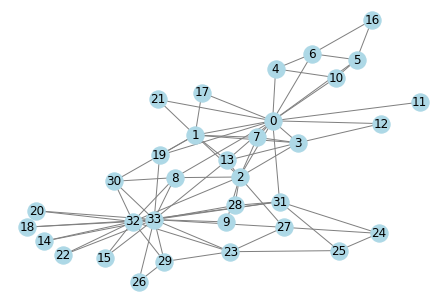

In [182]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels = True, node_color = 'lightblue', edge_color = 'gray')
plt.savefig('karategraph.pdf')

NetworkX stores the degrees of nodes in a DegreeView object (similar to a dictionary). Where the keys are node ids and the values are the degress. We can get access to it using the .degree() method

In [183]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

We can use this DegreeView object to find the degree of a given node, OR we can use the G.degree() function or G.degree() method. THEY ARE DIFFERENT! One has no arguments, the other has one argument

In [184]:
G.degree()[33]

G.degree(33)

17

17

In [185]:
# How many nodes and edges are included in the karate club network (as described in Video 4.3.3)?
# You can use G = nx.karate_club_graph() to create the graph.

G = nx.karate_club_graph()
G.number_of_nodes(), G.number_of_edges()

#34 nodes, 78 edges

(34, 78)

In [186]:
# What does G.degree(0) is G.degree()[0] return?
G.degree(0) is G.degree()[0]

#True

True

## 4.3.4: Random Graphs
***
- Learn how to write a function to build an __Erdős-Rényi graph__

- In the same way that we can generate random numbers from a given distribution (normal, binomial, ...), we can sample random graphs from a collection/ensemble of random graphs
- Just like different distributions of numbers give rise to different samples of numbers, different random graph models give rise to different random graphs

- Erdős-Rényi (ER) Graphs:
    - 2 parameters: N (number of nodes), p (probability for any pair of nodes to be connected by an edge)
    - Consider a graph with N nodes no edges:
        - we can go through each possible pair of nodes with probabily p that there is an edge between them
        - consider each pair of nodes once, then move on to the next pair
    - if samll p, graphs are sparse (few edges)
    - if large p, graphs are dense

NetworkX has an ER generator but we will make our own

In [187]:
#implement the 'coin flip' one time 
from scipy.stats import bernoulli
#only input argument is p=probability of success. Here the outcome is between 0s and 1s. P is the probability 
# that we get 1 as opposed to 0
bernoulli.rvs(p=0.2)
bernoulli.rvs(p=0.2)
bernoulli.rvs(p=0.2)
bernoulli.rvs(p=0.2)
bernoulli.rvs(p=0.2)
bernoulli.rvs(p=0.2)
#Mostly 0s but some 1s as well



0

0

0

0

0

0

20

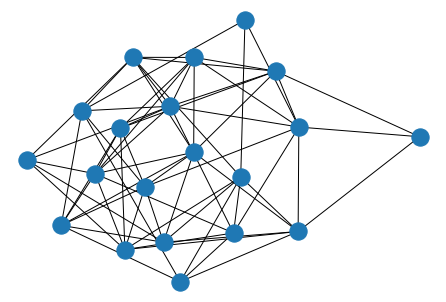

In [188]:
#informal pseudocode for experimentation
N = 20
p = 0.2 

#create an empty graph
#add all N nodes in the graph
#loop over all PAIRS of nodes 
    # add an edge with probability p

#bernoulli.rvs returns either 0 or 1, if bernoulli.rvs(p=p) is true or 1, then add the edge. you don't need to write if bernoulli.rvs(p=p) == True:, just keep the if statement as is

G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes(): 
        if bernoulli.rvs(p=p):
            G.add_edge(node1, node2)

G.number_of_nodes()
nx.draw(G)

This graph looks too densely connected to be right, and that's because we have an error in our code: we're considering each pair of notes twice. Since our graph is undirected, we should consider each pair of nodes only once:

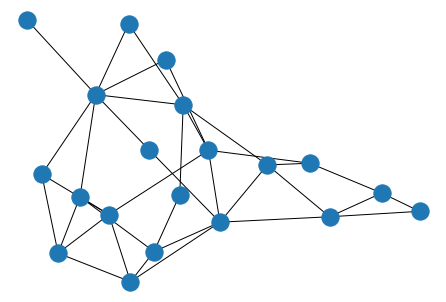

In [189]:
N = 20
p = 0.2 

G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes(): 
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1, node2)
nx.draw(G)

Now, let's turn this into a function

In [190]:
def er_graph(N, p):
    '''Generate an ER graph'''
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes(): 
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G

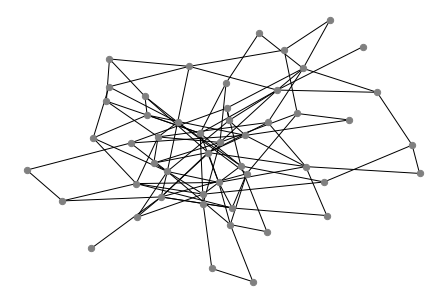

In [191]:
nx.draw(er_graph(50,0.08), node_size = 40, node_color = 'gray')
plt.savefig('er1.pdf')

In [192]:
# How many components do you expect in an Erdős-Rényi graph with n=10 and p=1?
# You can use nx.erdos_renyi_graph() to create the graph.

# 1. The probability of connection between any two given nodes is 1 (100% certain), therefore it is a connected graph


# How many components do you expect in an Erdős-Rényi graph with n=10 and p=0?
# 10. The probability of connection between any two given nodes is 0 (0% certain), therefore it is a completely disconnected graph


## 4.3.5: Plotting the Degree Distribution
***
- Learn how to __plot the degree distribution__ of a graph

Note: Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this unit...

Note that G.degree() now returns a DegreeView object rather than a dictionary.
In the video from 0:36-1:24, we used the following line of code:
```
plt.hist(list(G.degree().values()), histtype="step”)
```
The above line must be replaced with the following lines of code:
```
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, histtype="step")
```

We're going to have to do this again soon, so we will put all of this together as a function.

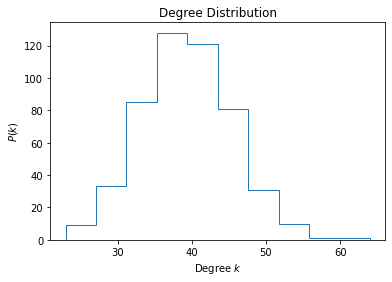

In [193]:
#make a list of the degree values of the different nodes uusing a list comprehension
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel('Degree $k$')
    plt.ylabel('$P(k)$')
    plt.title('Degree Distribution')

G = er_graph(500,0.08)
plot_degree_distribution(G)
plt.savefig('hist1.pdf')

Let's try generating a couple of different graphs using the er_graph function, and plot their degree distributions


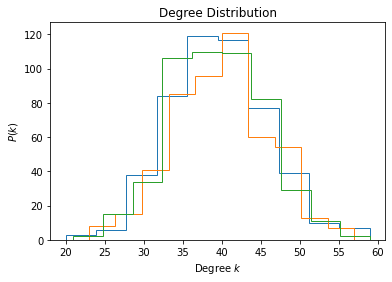

In [194]:
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig('hist_3.pdf')

In [195]:
# Consider the following code:
# D = {1:1, 2:2, 3:3}
# plt.hist(D)
# What will this plot?

D = {1:1, 2:2, 3:3}
plt.hist(D)

#This code contains an error: plt.hist does not take dictionaries a single argument.

TypeError: '<' not supported between instances of 'dict' and 'float'

In [196]:
# How do the degree distributions in nx.erdos_renyi_graph(100, 0.03) and nx.erdos_renyi_graph(100, 0.30) compare?

#The latter distribution has a greater mean on average.

## 4.3.6: Descriptive Statistics of Emperical Social Networks
***
- Look at the basic __properties of social networks__ in two villages in rural India
- __Compare the degree distribution__ of these empirical networks with the degree distribution of the ER networks

Note:
Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this unit...

Note that G.degree() now returns a DegreeView object rather than a dictionary.
In the video at about 4:07, we used the following line of code:
```
print("Average degree: %.2f" % np.mean(list(G.degree().values)))
```
The above line must be replaced with the following lines of code:
```
degree_sequence = [d for n, d in G.degree()]
print("Average degree: %.2f" % np.mean(degree_sequence))
```

These data are part of a larger dataset that was collected to study the diffusion of microfinance. A census of households was conducted, and a subset of individuals was asked detailed questions about the relationships they had with others in the village. This information was used to create networks of each village. The study can be found here: https://science.sciencemag.org/content/341/6144/1236498.full

In [197]:
import numpy as np
A1 = np.loadtxt('/Users/ashishsrivastava/Desktop/Central/Python/HarvardX_PH526x/week_4/week_4_case_studies/4.3_social_media_analysis/adj_allVillageRelationships_vilno_1.csv', delimiter = ',')
A2 = np.loadtxt('/Users/ashishsrivastava/Desktop/Central/Python/HarvardX_PH526x/week_4/week_4_case_studies/4.3_social_media_analysis/adj_allVillageRelationships_vilno_2.csv', delimiter = ',')

# loading from the course site
# A1 = np.loadtxt('https://courses.edx.org/assets/courseware/v1/73e495dede402cd2b4a6087725fdad19/asset-v1:HarvardX+PH526x+1T2020+type@asset+block/adj_allVillageRelationships_vilno_1.csv', delimiter = ',')
# A2 = np.loadtxt('https://courses.edx.org/assets/courseware/v1/e39da5bc543c636c1c4c8bd376fb8c44/asset-v1:HarvardX+PH526x+1T2020+type@asset+block/adj_allVillageRelationships_vilno_2.csv', delimiter = ',')

Now we want to convert these adjacency matrices to graph objects using the .to_networkx_graph method

In [198]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


Though networks can be quite complex, we can measure some of their properties using simple numbers

In [199]:
def basic_net_stats(G):
    print('Number of nodes: %d' % G.number_of_nodes())
    print('Number of edges: %d' % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

basic_net_stats(G1)

basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


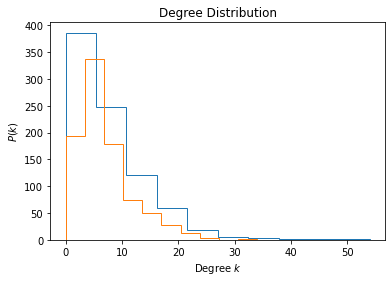

In [200]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig('village_hist.pdf')

This distribution doesn't look at all symmetric. Most people have few connections, and only a few people have lots of connections. It's tail extends quite far to the right. This looks very different from our ER graph, meaning that ER graphs are not good models of social connections

We can use ER graphs as a 'reference graph' by comparing their properties to those of empirical social networks. 

In [201]:
# As described in Video 4.3.6, which network has more nodes?
# G2 (877 vs 843)

# As described in Video 4.3.6, which network has more edges?
# G1 (3405 vs 3063)


## 4.3.7: Finding the Largest Connected Component
***
- Learn how to find the largest connected component in a network
- Learn how to visualize the largest connected component


In most networks, most nodes are connected to each other as part of a single connected component (for each pair of nodes in this component, there exists a set of edges that creates a path between them).

Now, let's find out how large the largest connected component is in our two graphs

In [202]:
# the commented out code no longer works, you have to use the new code
# nx.connected_component_subgraphs(G1)
(G1.subgraph(c) for c in nx.connected_components(G1))

<generator object <genexpr> at 0x7fadb61cdc50>

Python tells us that this is a generator object. Generator objects do not give a single value, but can be used to generate a sequence of objects using the next method

In [203]:
gen = (G1.subgraph(c) for c in nx.connected_components(G1))
g = gen.__next__()

type(g)
# G is a network graph, so we can ask 'what is the number of connected components in this graph?'
g.number_of_nodes()
len(gen.__next__())
#the next subsequent compenent has 3 nodes in it
len(gen.__next__())
len(gen.__next__())
len(gen.__next__())
len(gen.__next__())


networkx.classes.graph.Graph

825

3

3

4

2

4

Note that len, when applied to a graph object, returns the number of nodes in that object. 

In [204]:
len(G1)
G1.number_of_nodes()

843

843

In [205]:
# when we run this line, Python is telling us that there is a component in the graph that has size 1 in thihs case
len(gen.__next__())


1

One thing to note is that the ordering of these components is arbitrary. 

This is super tedious. In practice, we wouldn't keep calling the next method manually in this way, we'd use a function. A good way to proceed would be by using the max function, which can take in a generator as its input. How would it know which component is the maximum? What even is the maximum in this context?

We need to tell the max function what number to associate with each object in the sequence (graph). The size of a component is the number of nodes it contains. 





In [214]:
gen = (G1.subgraph(c) for c in nx.connected_components(G1))
G1_LCC = max((G1.subgraph(c) for c in nx.connected_components(G1)), key = len)
G2_LCC = max((G2.subgraph(c) for c in nx.connected_components(G2)), key = len)
len(G1_LCC)
#or G1_LCC.number_of_nodes()
len(G2_LCC)

825

810

Now let's compute the proportion of nodes that lie in the largest connected components for each graph

In [216]:
G1_LCC.number_of_nodes()/G1.number_of_nodes()
G2_LCC.number_of_nodes()/G2.number_of_nodes()

0.9786476868327402

0.9236031927023945

In practice, it is very common for networks to contain one component that encompasses a large majority of the nodes. 

Now let's visualize these components

<Figure size 432x288 with 0 Axes>

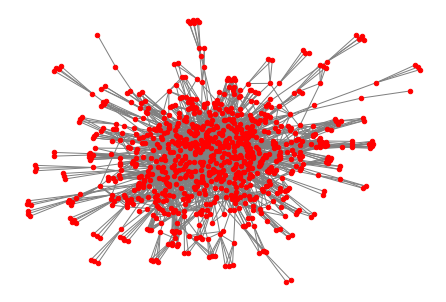

In [217]:
plt.figure()
nx.draw(G1_LCC, node_color = 'red', edge_color = 'gray', node_size = 20)
plt.savefig('village1.pdf')


<Figure size 432x288 with 0 Axes>

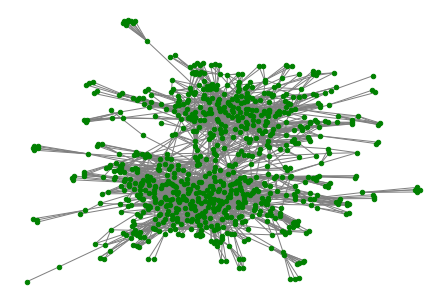

In [219]:
plt.figure()
nx.draw(G2_LCC, node_color = 'green', edge_color = 'gray', node_size = 20)
plt.savefig('village2.pdf')

This visualization algorithm is stochastic: if you run it multiple times, you'll always get a somewhat different graph layout. BUT in most visualizations you can see the largest connected component of G2 consists of two big groups, called network communities. A community is a group of nodes that are densely connected to other nodes in the group, but ony sparsely to nodes outside of the group. This is a problem that's very difficult mathematically.

In [ ]:
# For an iterator object X, what does X.__next__() do?
# A: Returns the next value in X, if it exists

# For a given network G, what does len(G) return?
# A: The number of nodes

# Graphs G1 and G2 are defined as in Video 4.3.7. Which graph contains the largest connected component?
# A: G1 (825 nodes)

# Graphs G1 and G2 are defined as in Video 4.3.7. Which graph contains the greatest fraction of its nodes in its largest connected component?
# A: G1 (97.8%)


